##### Load and Setup

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Data-parallel add without any tasking
dp_add = pd.read_csv("basic-add-usm/timings.csv")
# Single-kernel MultiQ Add
sk_add = pd.read_csv("single-kernel-multiQ-add/timings.csv")
splitk_add = pd.read_csv("split-kernel-multiQ-add/timings.csv")
oneq_add = pd.read_csv("gsq-add/timings.csv")

##### Data-parallel add (no tasking)

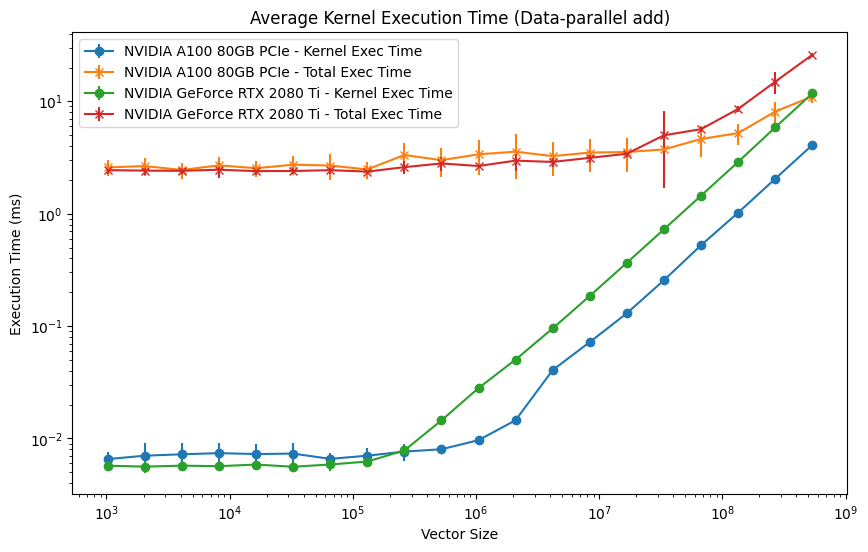

In [23]:
dp_grouped = dp_add.groupby(["VectorSize","Event", "Device"])["ExecTime(ms)"].agg(["mean", "std"]).reset_index()

#print(dp_grouped.head(10))
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xscale("log")
ax.set_yscale("log")
# Iterate over each device type
for device in dp_grouped['Device'].unique():
    device_data = dp_grouped[dp_grouped['Device'] == device]
    ax.errorbar(device_data[device_data['Event'] == 'Kernel Exec Time']['VectorSize'], 
                 device_data[device_data['Event'] == 'Kernel Exec Time']['mean'], 
                 yerr=device_data[device_data['Event'] == 'Kernel Exec Time']['std'], 
                 label=f"{device} - Kernel Exec Time", fmt='-o')
    # Plotting error bars for 'Total Exec Time' event
    ax.errorbar(device_data[device_data['Event'] == 'Total Exec Time']['VectorSize'], 
                 device_data[device_data['Event'] == 'Total Exec Time']['mean'], 
                 yerr=device_data[device_data['Event'] == 'Total Exec Time']['std'], 
                 label=f"{device} - Total Exec Time", fmt='-x')

# Set labels and title
ax.set_xlabel('Vector Size')
ax.set_ylabel('Execution Time (ms)')
ax.set_title('Average Kernel Execution Time (Data-parallel add)')
ax.legend()

# Show plot
plt.show()





##### Single-Kernel MultiQ Add - kernel exec time as a function of work-group size

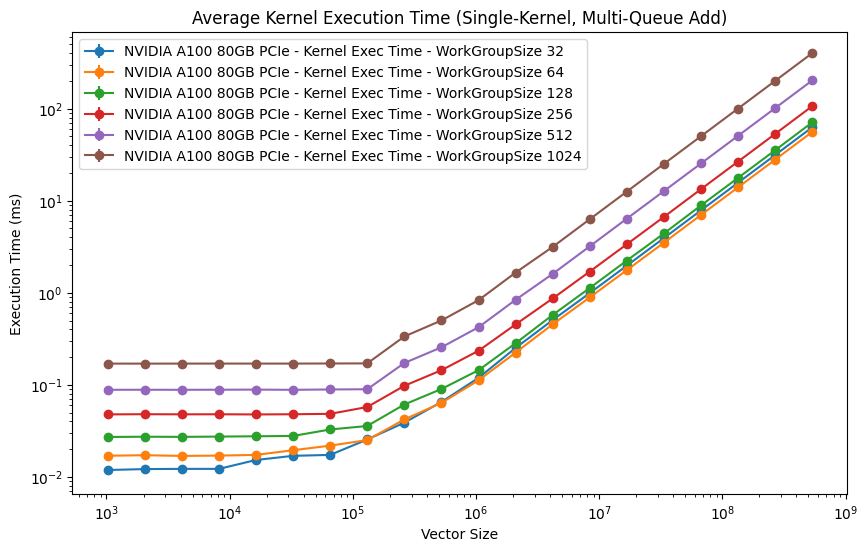

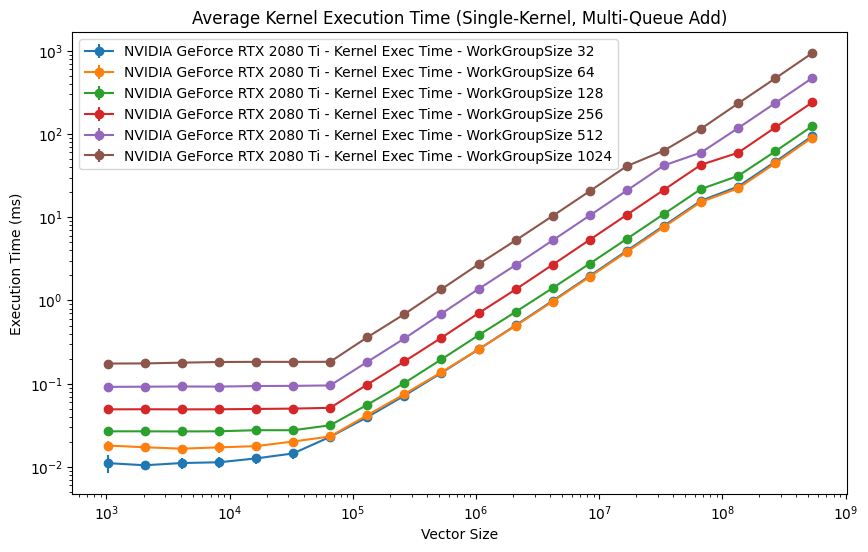

In [24]:
sk_grouped = sk_add.groupby(["VectorSize","Event","WorkGroupSize", "Device"])["ExecTime(ms)"].agg(["mean", "std"]).reset_index()
# Plotting

# Iterate over each device type
for device in sk_grouped['Device'].unique():
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.set_xscale("log")
    ax.set_yscale("log")

    for event in ["Kernel Exec Time"]:
        for wg_size in sk_grouped["WorkGroupSize"].unique():
            wg_data = sk_grouped[(sk_grouped["Device"] == device) & 
                                (sk_grouped["Event"] == event) &
                                (sk_grouped["WorkGroupSize"] == wg_size)
                                ]

            if not wg_data.empty:
                ax.errorbar(wg_data["VectorSize"],
                            wg_data["mean"],
                            yerr=wg_data["std"],
                            label=f"{device} - {event} - WorkGroupSize {wg_size}",
                            fmt="-o")
    device_data = sk_grouped[sk_grouped['Device'] == device]

    # Set labels and title
    ax.set_xlabel('Vector Size')
    ax.set_ylabel('Execution Time (ms)')
    ax.set_title(f'Average Kernel Execution Time (Single-Kernel, Multi-Queue Add)')    
    ax.legend()

    # Show plot
    plt.show()

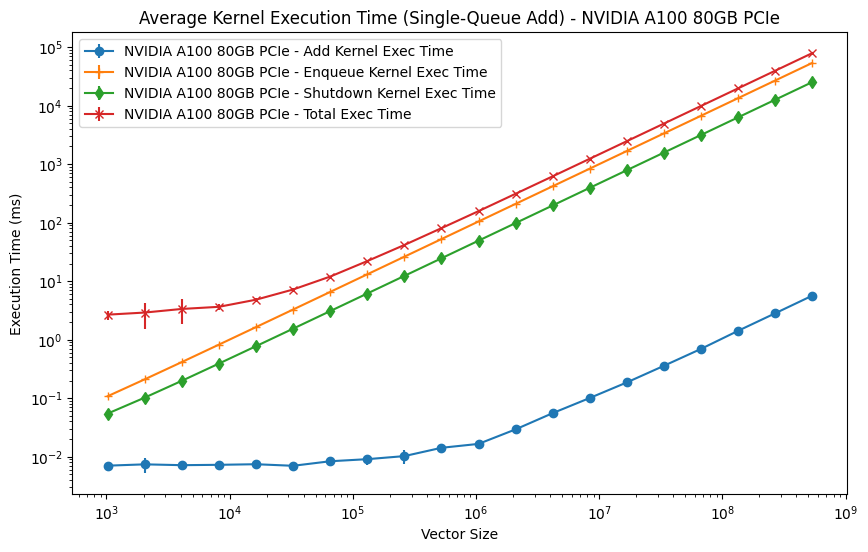

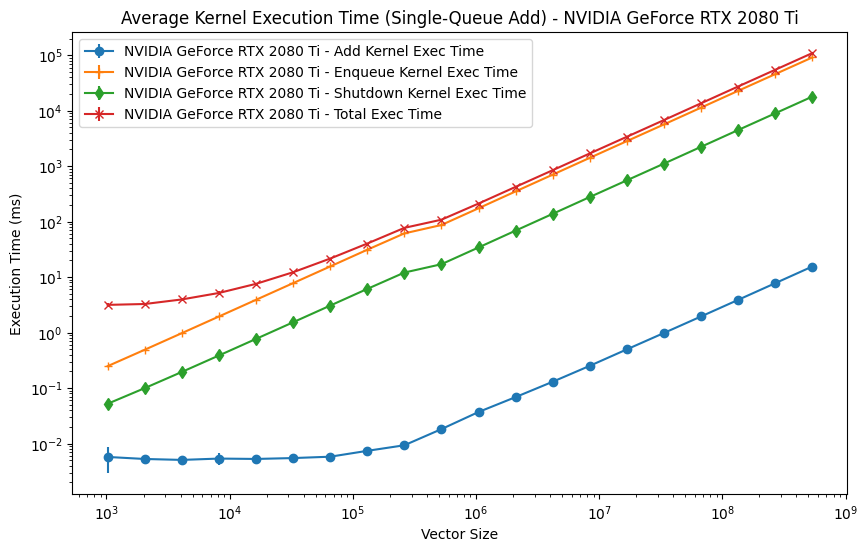

In [31]:
# Single-Queue Add
oneq_grouped = oneq_add.groupby(["VectorSize","Event", "Device"])["ExecTime(ms)"].agg(["mean", "std"]).reset_index()

# print(oneq_grouped.head(10))
# Plotting
for device in oneq_grouped['Device'].unique():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xscale("log")
    ax.set_yscale("log")    
    device_data = oneq_grouped[oneq_grouped['Device'] == device]
    ax.errorbar(device_data[device_data['Event'] == 'Add Kernel Exec Time']['VectorSize'], 
                 device_data[device_data['Event'] == 'Add Kernel Exec Time']['mean'], 
                 yerr=device_data[device_data['Event'] == 'Add Kernel Exec Time']['std'], 
                 label=f"{device} - Add Kernel Exec Time", fmt='-o')

    ax.errorbar(device_data[device_data['Event'] == 'Enqueue Kernel Exec Time']['VectorSize'], 
                 device_data[device_data['Event'] == 'Enqueue Kernel Exec Time']['mean'], 
                 yerr=device_data[device_data['Event'] == 'Enqueue Kernel Exec Time']['std'], 
                 label=f"{device} - Enqueue Kernel Exec Time", fmt='-+')

    ax.errorbar(device_data[device_data['Event'] == 'Shutdown Kernel Exec Time']['VectorSize'], 
                 device_data[device_data['Event'] == 'Shutdown Kernel Exec Time']['mean'], 
                 yerr=device_data[device_data['Event'] == 'Shutdown Kernel Exec Time']['std'], 
                 label=f"{device} - Shutdown Kernel Exec Time", fmt='-d')
    # Plotting error bars for 'Total Exec Time' event
    ax.errorbar(device_data[device_data['Event'] == 'Total Exec Time']['VectorSize'], 
                 device_data[device_data['Event'] == 'Total Exec Time']['mean'], 
                 yerr=device_data[device_data['Event'] == 'Total Exec Time']['std'], 
                 label=f"{device} - Total Exec Time", fmt='-x')

    ax.set_xlabel('Vector Size')
    ax.set_ylabel('Execution Time (ms)')
    ax.set_title(f'Average Kernel Execution Time (Single-Queue Add) - {device}')
    ax.legend()

    # Show plot
    plt.show()



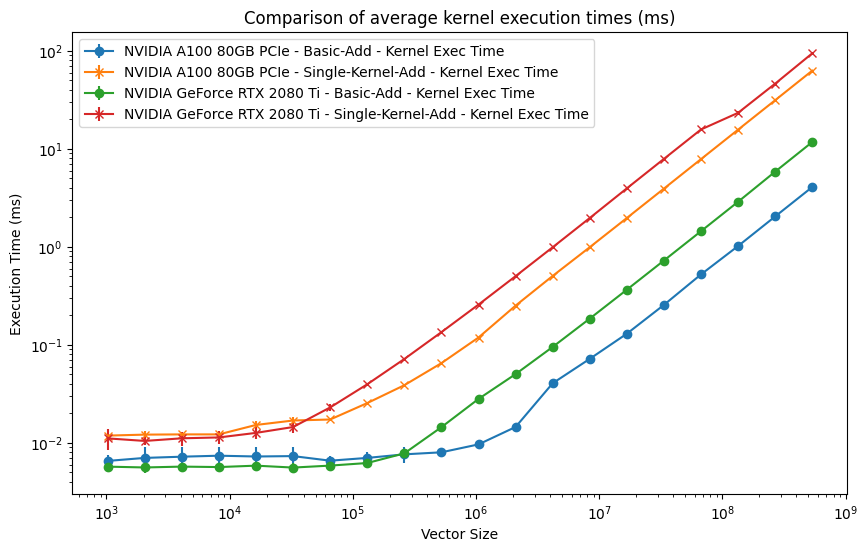

In [26]:
# Comparison
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xscale("log")
ax.set_yscale("log")
# Iterate over each device type
for device in dp_grouped['Device'].unique():
    dp_dev = dp_grouped[dp_grouped['Device'] == device]
    ax.errorbar(dp_dev[dp_dev['Event'] == 'Kernel Exec Time']['VectorSize'], 
                 dp_dev[dp_dev['Event'] == 'Kernel Exec Time']['mean'], 
                 yerr=dp_dev[dp_dev['Event'] == 'Kernel Exec Time']['std'], 
                 label=f"{device} - Basic-Add - Kernel Exec Time", fmt='-o')

    sk_dev = sk_grouped[(sk_grouped["Device"] == device) & (sk_grouped["WorkGroupSize"] == 32)]
    ax.errorbar(sk_dev[sk_dev['Event'] == 'Kernel Exec Time']['VectorSize'], 
                    sk_dev[sk_dev['Event'] == 'Kernel Exec Time']['mean'], 
                    yerr=sk_dev[sk_dev['Event'] == 'Kernel Exec Time']['std'], 
                    label=f"{device} - Single-Kernel-Add - Kernel Exec Time", fmt='-x')
# Set labels and title
ax.set_xlabel('Vector Size')
ax.set_ylabel('Execution Time (ms)')
ax.set_title('Comparison of average kernel execution times (ms)')
ax.legend()

# Show plot
plt.show()

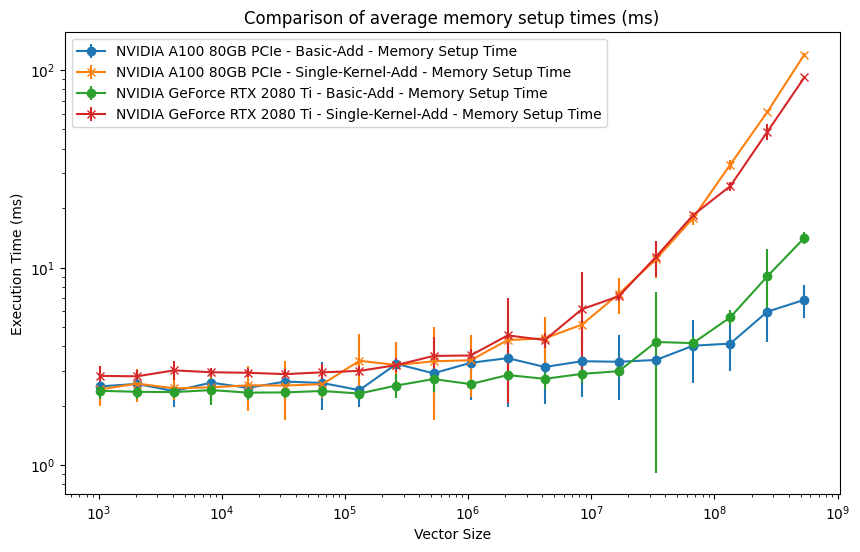

In [27]:
# Comparison
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xscale("log")
ax.set_yscale("log")
# Iterate over each device type
for device in dp_grouped['Device'].unique():
    dp_dev = dp_grouped[dp_grouped['Device'] == device]
    ax.errorbar(dp_dev[dp_dev['Event'] == 'Memory Setup Time']['VectorSize'], 
                 dp_dev[dp_dev['Event'] == 'Memory Setup Time']['mean'], 
                 yerr=dp_dev[dp_dev['Event'] == 'Memory Setup Time']['std'], 
                 label=f"{device} - Basic-Add - Memory Setup Time", fmt='-o')

    sk_dev = sk_grouped[(sk_grouped["Device"] == device) & (sk_grouped["WorkGroupSize"] == 32)]
    ax.errorbar(sk_dev[sk_dev['Event'] == 'Memory Setup Time']['VectorSize'], 
                    sk_dev[sk_dev['Event'] == 'Memory Setup Time']['mean'], 
                    yerr=sk_dev[sk_dev['Event'] == 'Memory Setup Time']['std'], 
                    label=f"{device} - Single-Kernel-Add - Memory Setup Time", fmt='-x')
# Set labels and title
ax.set_xlabel('Vector Size')
ax.set_ylabel('Execution Time (ms)')
ax.set_title('Comparison of average memory setup times (ms)')
ax.legend()

# Show plot
plt.show()

0     0.969621
2     0.970363
4     0.967046
6     0.970541
8     0.968744
10    0.970118
12    0.970952
14    0.967780
16    0.976421
18    0.973071
20    0.976037
22    0.975823
24    0.964660
26    0.958383
28    0.942887
30    0.911920
32    0.870675
34    0.789939
36    0.738190
38    0.622548
Name: Proportion_Memory, dtype: float64


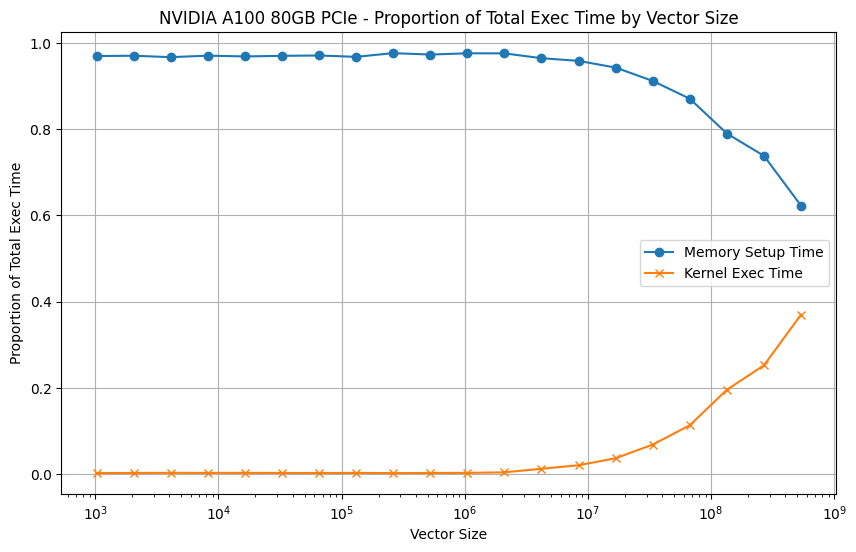

1     0.972912
3     0.972743
5     0.972474
7     0.973486
9     0.972225
11    0.972555
13    0.972631
15    0.971896
17    0.974277
19    0.973471
21    0.967241
23    0.963009
25    0.946235
27    0.921766
29    0.875505
31    0.842204
33    0.733415
35    0.654881
37    0.603891
39    0.544714
Name: Proportion_Memory, dtype: float64


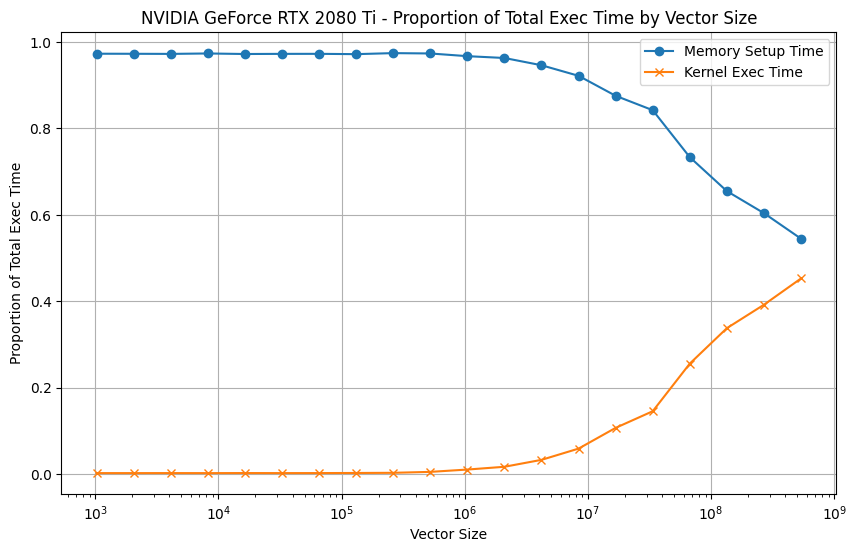

In [28]:
# Proportion of total time

total_exec_time = dp_grouped[dp_grouped['Event'] == 'Total Exec Time'].set_index(['Device', 'VectorSize'])['mean']

# Calculate proportions of ExecTime taken by Memory Setup Time and Kernel Exec Time
df_memory = dp_grouped[dp_grouped['Event'] == 'Memory Setup Time'].set_index(['Device', 'VectorSize'])['mean']
df_kernel = dp_grouped[dp_grouped['Event'] == 'Kernel Exec Time'].set_index(['Device', 'VectorSize'])['mean']

proportions_memory = (df_memory / total_exec_time).reset_index(name='Proportion_Memory')
proportions_kernel = (df_kernel / total_exec_time).reset_index(name='Proportion_Kernel')

df_proportions = pd.merge(proportions_memory, proportions_kernel, on=['Device', 'VectorSize'])

# Plotting
for device in df_proportions["Device"].unique():
    df_device = df_proportions[df_proportions['Device'] == device]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xscale("log")
    print(df_device["Proportion_Memory"])
    ax.plot(df_device['VectorSize'], df_device['Proportion_Memory'], marker='o', linestyle='-', label="Memory Setup Time")
    ax.plot(df_device['VectorSize'], df_device['Proportion_Kernel'], marker='x', linestyle='-', label="Kernel Exec Time")
    
    ax.set_title(f'{device} - Proportion of Total Exec Time by Vector Size')
    ax.set_xlabel('Vector Size')
    ax.set_ylabel('Proportion of Total Exec Time')
    ax.grid(True)
    ax.legend()
    
    plt.show()

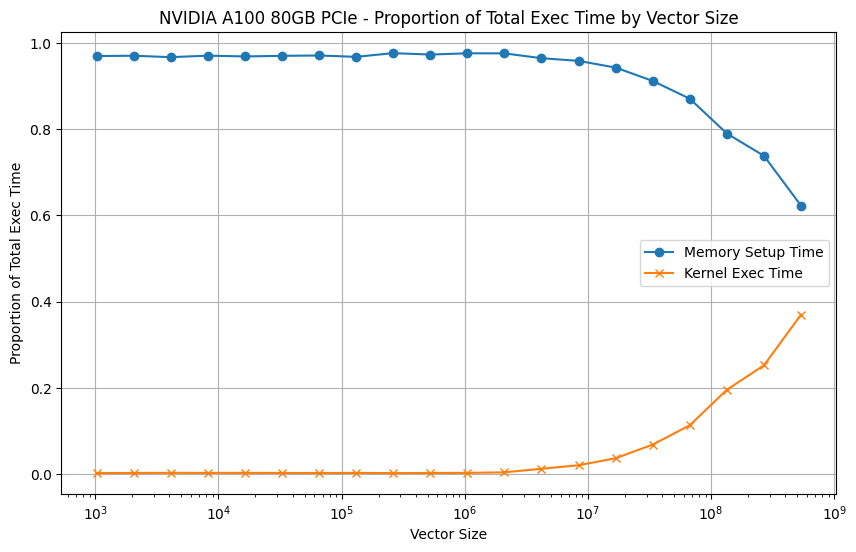

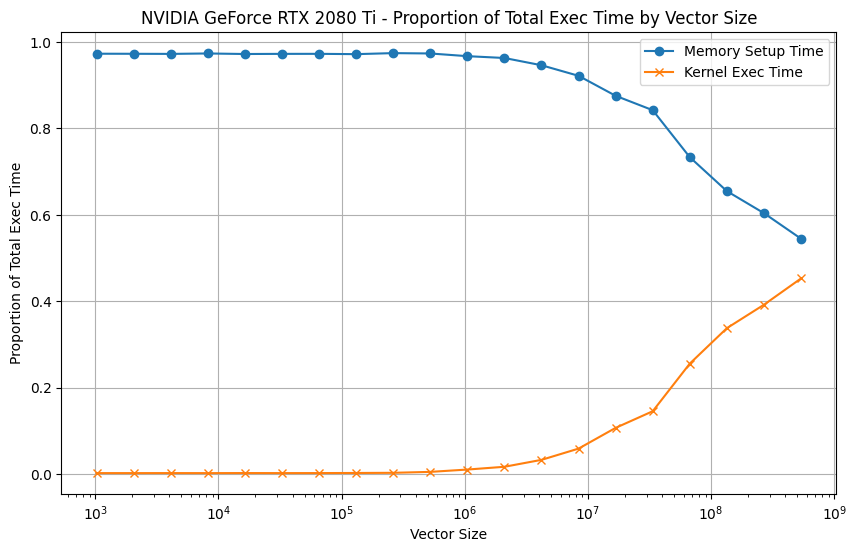

In [29]:

# Proportion of total time
sk32 = sk_grouped[(sk_grouped["WorkGroupSize"] == 32)].reset_index()

total_exec_time = sk32[sk32['Event'] == 'Total Exec Time'].set_index(['Device', 'VectorSize'])['mean']# Merge proportions into a single dataframe

# Plotting
for device in df_proportions["Device"].unique():
    df_device = df_proportions[df_proportions['Device'] == device]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xscale("log")
    
    ax.plot(df_device['VectorSize'], df_device['Proportion_Memory'], marker='o', linestyle='-', label="Memory Setup Time")
    ax.plot(df_device['VectorSize'], df_device['Proportion_Kernel'], marker='x', linestyle='-', label="Kernel Exec Time")
    
    ax.set_title(f'{device} - Proportion of Total Exec Time by Vector Size')
    ax.set_xlabel('Vector Size')
    ax.set_ylabel('Proportion of Total Exec Time')
    ax.grid(True)
    ax.legend()
    
    plt.show()


0


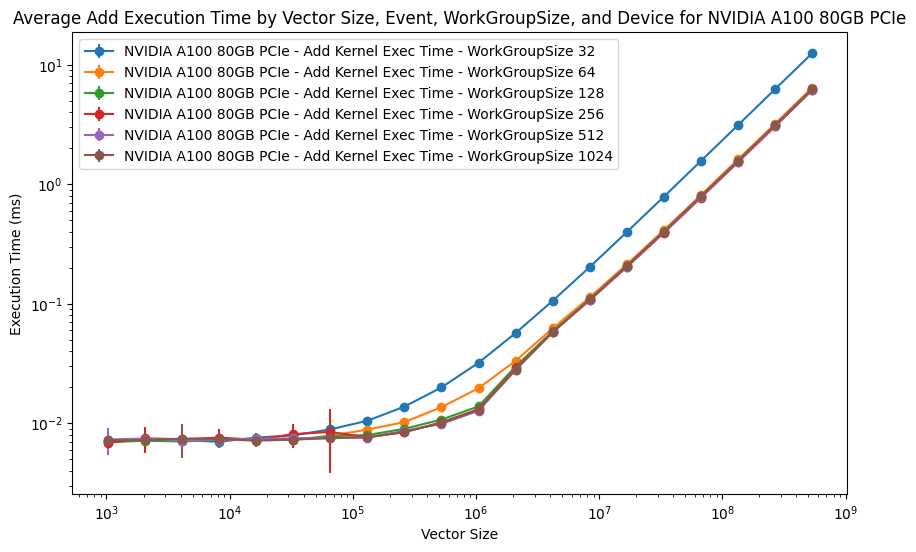

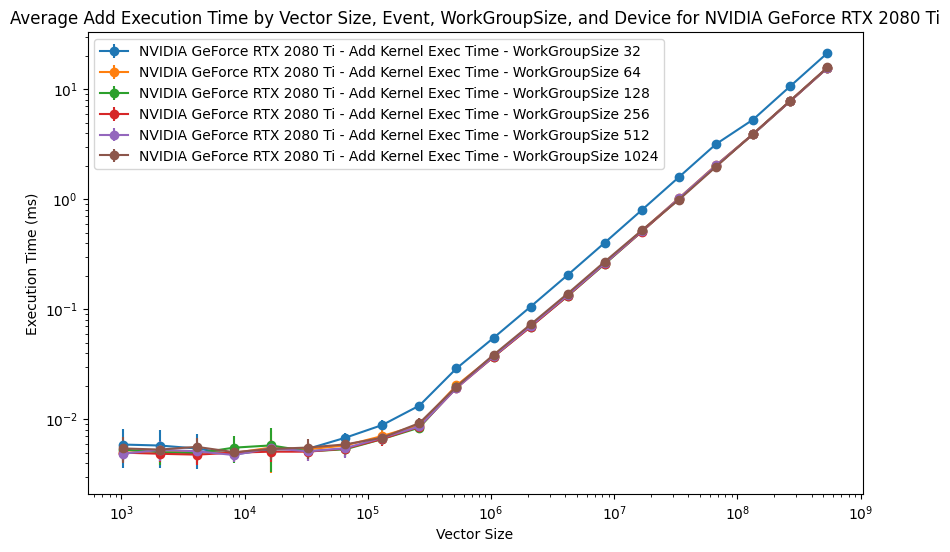

In [30]:
grouped = splitk_add.groupby(["VectorSize","Event","WorkGroupSize", "Device"])["ExecTime(ms)"].agg(["mean", "std"]).reset_index()
# Plotting
adds = grouped[(grouped["Event"] == "Add Kernel Exec Time") & (grouped["std"] > 1)]
print(len(adds))
adds.to_csv("adds.csv", index=False)
# Iterate over each device type
for device in grouped['Device'].unique():
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.set_xscale("log")
    ax.set_yscale("log")

    for event in ["Add Kernel Exec Time"]:
        for wg_size in grouped["WorkGroupSize"].unique():
            wg_data = grouped[(grouped["Device"] == device) & 
                                (grouped["Event"] == event) &
                                (grouped["WorkGroupSize"] == wg_size)
                                ]

            if not wg_data.empty:
                ax.errorbar(wg_data["VectorSize"],
                            wg_data["mean"],
                            yerr=wg_data["std"],
                            label=f"{device} - {event} - WorkGroupSize {wg_size}",
                            fmt="-o")
    device_data = grouped[grouped['Device'] == device]

    # Set labels and title
    ax.set_xlabel('Vector Size')
    ax.set_ylabel('Execution Time (ms)')
    ax.set_title(f'Average Add Execution Time by Vector Size, Event, WorkGroupSize, and Device for {device}')    
    ax.legend()

    # Show plot
    plt.show()